E1. Analiza dynamiki wybranej giełdy za pomocą  wybranej techniki teorii grafów 

**Research question: What are correlations between constituents?**

Celem tego ćwiczenia jest zbadanie dynamiki wybranej giełdy w okresie narastania wybranej bańki giełdowej oraz  jej pęknięcia, z wykorzystaniem teorii grafów. Realizacja ćwiczenia składa się  z następujących etapów:  

1.  wybór  giełdy  i  ściągnięcie  odpowiednich  empirycznych  danych  giełdowych  z  wybranej  strony internetowej lub uzyskanie ich bezpośrednio z danej giełdy,  
    1. Download FTSE100 historical data from yahoo, transform it into a dataframe and save to a file. 
    2. Plot number of constituents(time) for FTSE100
        1. To do it I should first check the data. Are there any missing values for certain constituents? I can achieve it through finding a start date for each ticker. It can be in a form of a list.
    3. Check is the data complete?
2.  Calculate correlations matrix for FTSE100
3.  dobór odpowiedniego modelu sieci oraz algorytmu generującego,  
4.  dobór właściwych przedziałów średniowania,  
5.  dyskusja  uzyskanych  wyników  a  w tym  zwłaszcza  ewentualnych  strukturalnych  topologicznych) przemian fazowych prowadzących do analizy kryzysu i krachu. 

### Questions
    Should I use log transformation?
    How should I calculate <Si> How many days average. (See exercise notes 1.2)
    How to calculate distances between companies? How to interpret them?

[Exercise materials](https://drive.google.com/open?id=0ByG3ASYoU228cnFHaEZDR0tQcWlaZlNGa2xoUEhNSUJfMDg4)

### Notes(Exercise materials)
    1.1 Diferences a couple orders of magnitude
    1.2 <Si> - average over for example 50 days.



In [3]:
import urllib,time,datetime
import pandas.io.data as web
import pandas as pd
import numpy as np
import pylab as py
import datetime as dt

%matplotlib inline

/home/pawel/anaconda3/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


1. 
    A. Below I download FTSE100 historical data from yahoo and save it to data_FTSE100.txt

In [26]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

In [5]:
with open('./constituents_FTSE100') as f:
    lines = f.readlines()

In [1]:
#fig = py.figure()
f=web.DataReader(lines[0].strip(), 'yahoo', start, end)

lines = lines[0:100]
y=[]

for line in lines:
    if len(line.strip())>1:
        try:
            f=web.DataReader(line.strip(), 'yahoo', start, end)
        except:
            raise
        else:
            y.append( f['Open'] )            
            #print( f )
#print ( y[0]['Open'] )
#print ( y[1] )
#print ( "And so on ..." )

# = y[0]['Open'] 

Stock_values_dataframe = pd.concat( y, axis=1 )

Stock_values_dataframe.columns = [ line.replace( "\n", "" ) for line in lines ]

#print( Stock_values_dataframe )


Stock_values_dataframe.to_csv( "./data_FTSE100.txt" )

#file = open( "./data_FTSE100.txt", "w" )
#for i in y:
#    file.write( str( i ) ) 
#file.close()

NameError: name 'web' is not defined

## Note
    In 1. A. I downloaded data for FTSE100 and saved it to a file. Below read data from the file. 

In [4]:
Stock_values_dataframe = pd.read_csv( "./data_FTSE100.txt" )

print( Stock_values_dataframe )
print( len( lines ) )
#print( lines[] )

            Date   AAL.L    ABF.L  ADM.L  ADN.L  AGK.L     AHT.L   ANTO.L  \
0     1988-05-03     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
1     1988-05-04     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
2     1988-05-05     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
3     1988-05-06     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
4     1988-05-09     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
5     1988-05-10     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
6     1988-05-11     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
7     1988-05-12     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
8     1988-05-13     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
9     1988-05-16     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
10    1988-05-17     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
11    1988-05-18     NaN      NaN    NaN    NaN    NaN       NaN      NaN   

NameError: name 'lines' is not defined

### 1. B. Below I calculate number of constituents( time )

In [5]:
#py.xlabel('Date')
#py.ylabel('liczba spolek')
#py.title('FTSE100')

constituents_tickers = Stock_values_dataframe.columns[ 1: ]

start_dates_constituents_list = []

print( Stock_values_dataframe.loc[ 2, "ABF.L" ] ) 

for constituent_ticker in constituents_tickers:
    for date_index in range( len( Stock_values_dataframe ) ):
        if Stock_values_dataframe.loc[ date_index, constituent_ticker ] == Stock_values_dataframe.loc[ 
            date_index, constituent_ticker ]:
            start_dates_constituents_list.append( Stock_values_dataframe[ 'Date' ][ date_index ] )
            break
                                  
                        
#print( Stock_values_dataframe['Date'] )
print( start_dates_constituents_list )
#    for k in y:
#        if k<=i:
#            j+=1
#    x.append(j)

#py.plot(y,x, 'ro')
#py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

nan
['1999-05-24', '1988-07-01', '2004-09-23', '1991-03-28', '1997-09-29', '1988-07-01', '1988-07-01', '1998-04-17', '1988-07-01', '1993-05-21', '1988-07-01', '1989-08-11', '1988-07-01', '1995-01-03', '1988-07-01', '1988-07-01', '1988-07-01', '1997-07-22', '1988-07-01', '1988-07-01', '2002-07-12', '1988-07-01', '2013-04-29', '2000-10-23', '1997-02-17', '2000-01-04', '1989-04-24', '2000-01-04', '2009-10-01', '1988-05-03', '2012-10-11', '2006-10-09', '2000-11-15', '2008-05-09', '2003-07-15', '1988-07-01', '2011-05-19', '1988-07-01', '2005-11-01', '2007-05-15', '1988-07-01', '1988-07-05', '2003-01-02', '2003-03-31', '1993-03-31', '1996-10-01', '1989-01-31', '2002-05-24', '2000-01-04', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1995-12-28', '2001-07-20', '1988-07-01', '1988-07-01', '2007-06-29', '1988-07-01', '1995-12-11', '1988-07-01', '1999-07-12', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '1988-07-01', '2005-07-15', '2000-05-15', '1988-07-01', '1988-07-01', '

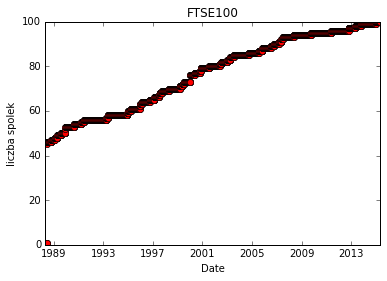

In [6]:
number_of_constituents_list = []
    
for date_index in range( len( Stock_values_dataframe ) ):
    number_of_constituents = 0
    for start_date in start_dates_constituents_list:
        if Stock_values_dataframe[ 'Date' ][ date_index ] > start_date:
            number_of_constituents += 1
    number_of_constituents_list.append( number_of_constituents )
    
    
#.date()
all_dates = [ dt.datetime.strptime( date, '%Y-%m-%d' ) for date in Stock_values_dataframe[ 'Date' ].tolist() ]
#y = range( len( x ) )

py.xlabel('Date')
py.ylabel('liczba spolek')
py.title('FTSE100')

#print( number_of_constituents_list )
py.plot( all_dates, number_of_constituents_list, 'ro' )
py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
#py.clf()

1.C. Check completeness of the data. 

In [ ]:
already_started = False

#x = []
#y = []

for constituent_number in range( len( constituents_tickers) ):
    for date_index in range( len( Stock_values_dataframe ) ):
        if ( not already_started ) and ( Stock_values_dataframe.loc[ date_index, 
                                                                    constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
            already_started = True
            
        if already_started: 
            if not ( Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] == 
                Stock_values_dataframe.loc[ date_index, constituents_tickers[ constituent_number ] ] ):
                print( "missing value" )
                #x.append( constituent_number )
                #y.append(  )
            

missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missing value
missin